<a href="https://colab.research.google.com/github/victor048/preco_das_acoes/blob/main/pre%C3%A7o_das_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descrição: 
### Este programa usa uma rede neural recorrente chamada Long Short Term Memory (LSTM).
### para prever o fechamento do preço das ações da corporação (Apple Inc), usando os ultimos 60 dias.

In [ ]:
# import das Bibliotecas
import math
import yfinance as yf
import pandas_datareader as web
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# pip install yfinance

#### Obtendo as cotações da ações

In [ ]:
df = yf.download('AAPL', data_source='yahoo', start='2017-03-10', end='2022-03-10')
# tentei usar 'web.datareader' para obter os dados da web mas deu erro, então usei yfinance

[*********************100%***********************]  1 of 1 completed


In [ ]:
display(df)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-10,34.812500,34.840000,34.660000,34.785000,32.842609,78451200
2017-03-13,34.712502,34.857498,34.705002,34.799999,32.856762,69686800
2017-03-14,34.825001,34.912498,34.709999,34.747501,32.807198,61236400
2017-03-15,34.852501,35.187500,34.757500,35.115002,33.154179,102767200
2017-03-16,35.180000,35.255001,35.064999,35.172501,33.208462,76928000
...,...,...,...,...,...,...
2022-03-02,164.389999,167.360001,162.949997,166.559998,166.559998,79724800
2022-03-03,168.470001,168.910004,165.550003,166.229996,166.229996,76678400
2022-03-04,164.490005,165.550003,162.100006,163.169998,163.169998,83737200


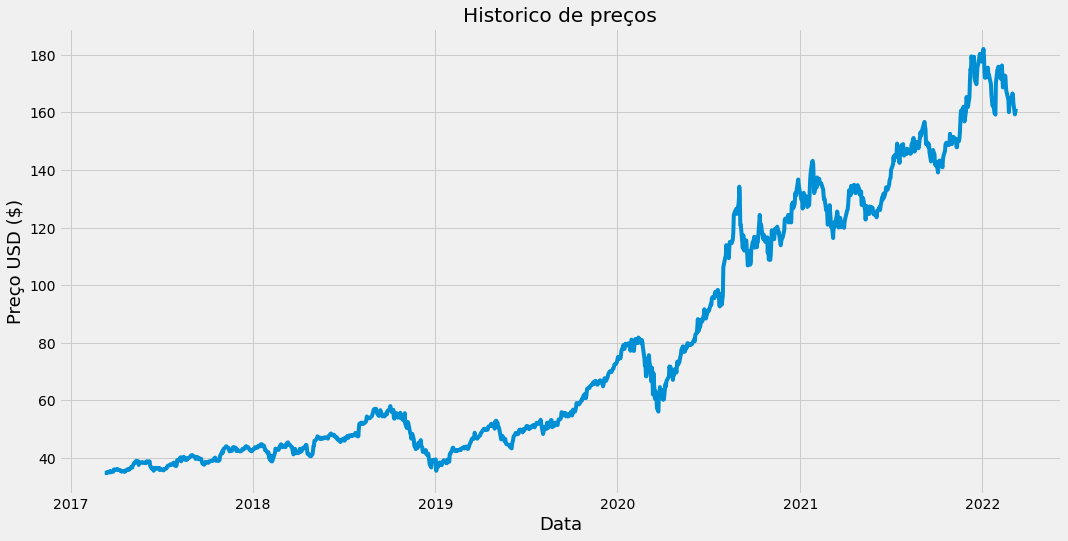

In [ ]:
# visualizando preço de fechamento
plt.figure(figsize=(16, 8))
plt.title('Historico de preços')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço USD ($)', fontsize=18)
plt.show()

In [ ]:
# Criando um novo dataframe com somente a '['Close']
data = df.filter(['Close'])
# Converte o dataframe para um Numpy array
dataset = data.values
# Eu quero calcular o numero de linhas para treinar nosso modelo
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

1007

In [ ]:
# transforma 1007 dados em 0, 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]
# dividindo os dados em conjunto de dados de train x e y
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00025464, 0.00035649, 0.        , 0.00249555, 0.002886  ,
       0.00169765, 0.00419319, 0.00144299, 0.00412527, 0.00327645,
       0.00280111, 0.00320856, 0.00816569, 0.00870892, 0.00838636,
       0.00792802, 0.00799591, 0.00981241, 0.00853917, 0.00792802,
       0.00738476, 0.00709616, 0.00448179, 0.00477039, 0.00349715,
       0.00482132, 0.00375179, 0.002869  , 0.00585688, 0.00556829,
       0.00789406, 0.00940496, 0.00796195, 0.00814869, 0.00791102,
       0.01288515, 0.01446395, 0.01370001, 0.01280026, 0.01692556,
       0.02380102, 0.02546473, 0.02422543, 0.02539681, 0.02904677,
       0.0283677 , 0.02797725, 0.01911552, 0.02300312, 0.02388591,
       0.02546473, 0.02514218, 0.02436125, 0.025261  , 0.02481962,
       0.02492147, 0.02337661, 0.02408962, 0.02794329, 0.02536285])]
[0.026245636492549157]



In [ ]:
# Convertendo x_train e y_train para numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(947, 60, 1)

In [ ]:
# contruindo o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Treinando modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

947/947 [==============================] - 28s 25ms/step - loss: 0.0014


In [ ]:
# criando o conjunto de teste
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len (test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# convertendo para nb.array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Obter os modelos prevendo o preço dos valores
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Obtendo a raiz do erro quadratico médio ou nosso RMSE
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse 

1.6019796546236926

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


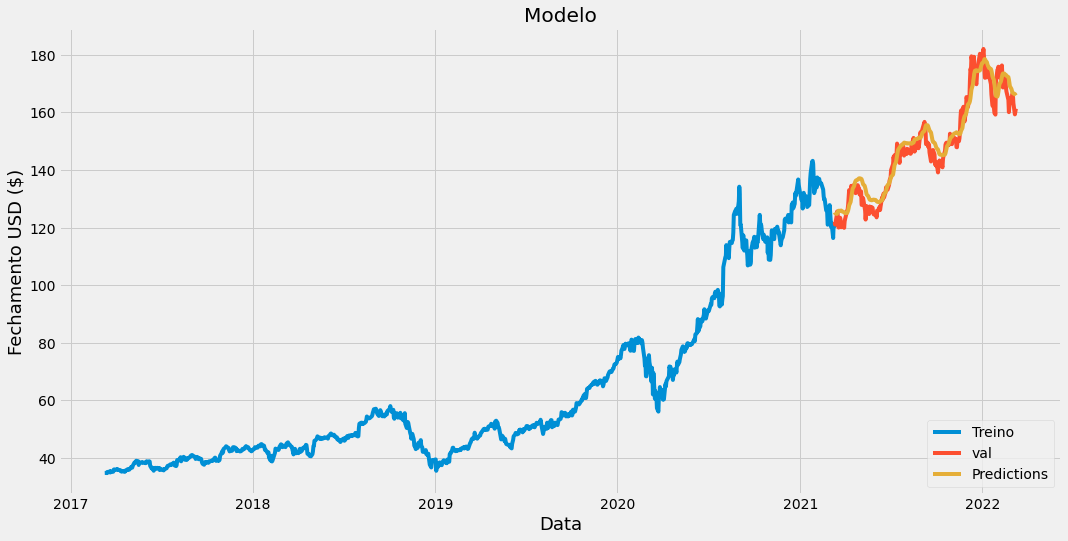

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Plot
plt.figure(figsize=(16,8))
plt.title('Modelo')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Fechamento USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Treino', 'val','Predictions'], loc='lower right')
plt.show()

In [ ]:
# certo vamos ver os preços reais(valid), e previstos
valid

,Close,Predictions
Date,,
2021-03-11,121.959999,125.267525
2021-03-12,121.029999,124.944099
2021-03-15,123.989998,124.728912
2021-03-16,125.570000,124.822937
2021-03-17,124.760002,125.204475
...,...,...
2022-03-02,166.559998,166.910172
2022-03-03,166.229996,166.649689
2022-03-04,163.169998,166.566452
